In [14]:
import os

import numpy as np
import matplotlib.pyplot as plt

from General.experiments.spectrum import TemporalSpectrum
from General.experiments import SpectroData
from General.plotting import plot, cbar
from General.numpy_funcs import block_average
from General.experiments.hdf5.readHDF5 import read_hdf5

In [2]:
loc = r'E:\OneDrive - TU Eindhoven\Master thesis\Measurements\lamp_test'
files = os.listdir(loc)
data = [SpectroData.read_raw8(rf'{loc}\{file}') for file in files]

C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:359: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


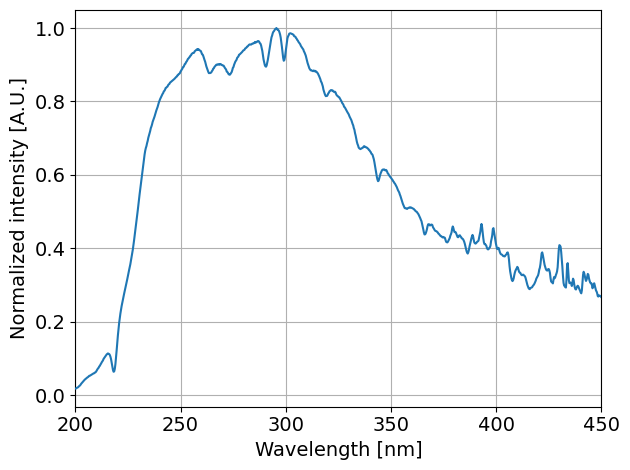

In [3]:
intensities = np.array([d.spectrum.intensities for d in data])
wavelengths = data[0].spectrum.wavelengths
absorbances = -np.log(intensities/intensities[0])
times = np.array([d.time_ms/1000 for d in data])
times = times - times[0]

temporal = TemporalSpectrum(wavelengths, absorbances, np.array(times))
avg_temporal = temporal.block_average(50)

plot_kwargs = {'xlim': (200, 450), 'xlabel': 'Wavelength [nm]', 'ylabel': 'Normalized intensity [A.U.]'}
plot.lines(wavelengths, intensities[0]/max(intensities[0]), plot_kwargs=plot_kwargs)

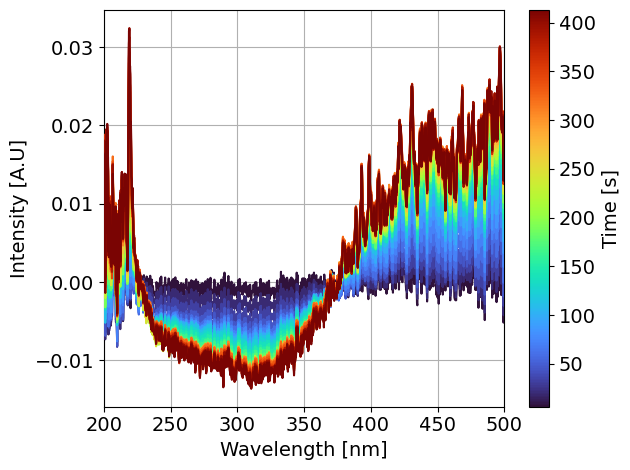

In [4]:
plot_kwargs = {'xlim': (200, 500)}
avg_temporal.plot_intensity_with_time(plot_kwargs=plot_kwargs)

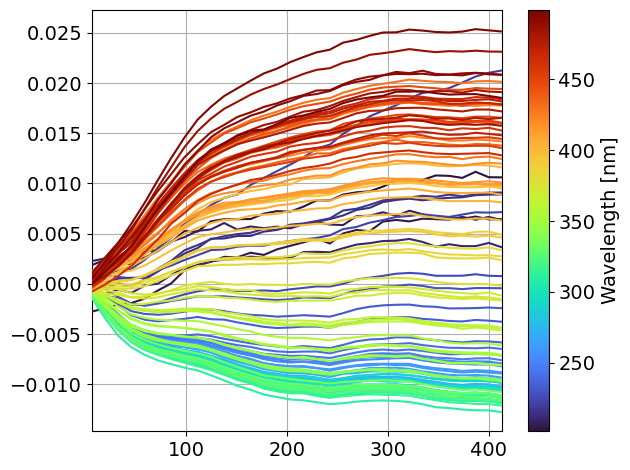

In [5]:
wavelengths = avg_temporal.wavelengths
times = avg_temporal.times
intensities = avg_temporal.intensities.T

mask = (wavelengths > 200) & (wavelengths < 500)

b_wavelengths = block_average(wavelengths[mask], 10)
b_intensities = block_average(intensities[mask], 10)

colors, cm = cbar.cbar_norm_colors(b_wavelengths)
cbar_kwargs = {'mappable': cm, 'label': 'Wavelength [nm]'}

plot.lines(times, b_intensities, colors=colors, cbar_kwargs=cbar_kwargs)

In [6]:
loc2 = r'E:\OneDrive - TU Eindhoven\Master thesis\Results'
data2 = read_hdf5(rf'{loc2}\Air_3slm_Ar_1slm_9kV_2us.hdf5')

C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:359: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


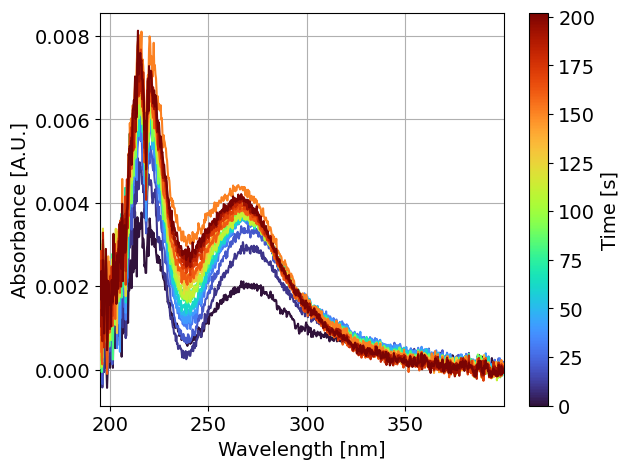

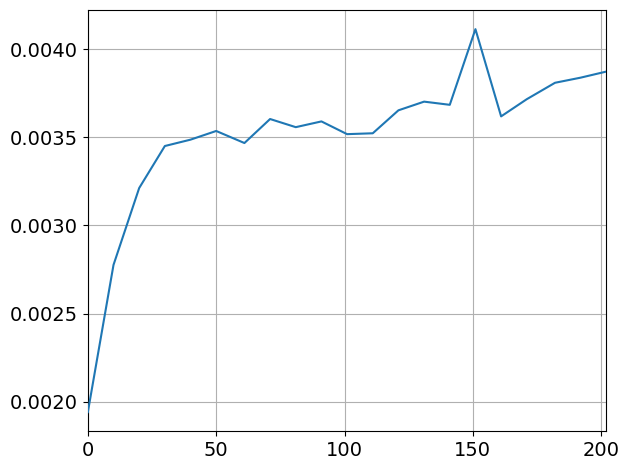

In [7]:
absorption = data2['absorbance']
oes = data2['emission']
wavelength_ranges = ((270, 330), (654, 659), (690, 860), (776, 779))
oes = oes.remove_background_interp_off(is_on_kwargs={'wavelength_range': wavelength_ranges, 'relative_threshold': 0.3})
mask = oes.is_on(wavelength_range=wavelength_ranges, relative_threshold=0.25)
on_time = oes.times[np.argwhere(np.diff(mask.astype(int)) == 1)[0, 0]-1]

absorbances = absorption.get_absorbances(masked=False)
mask = (400 < absorption.get_wavelength(masked=False)) & (absorption.get_wavelength(masked=False) < 500)
average = np.mean(absorbances[:, mask], axis=1)

mask = absorption.variable <= on_time

normed_absorbance = absorption.get_absorbances(corrected=True)[mask] - average[:, None][mask]
times = absorption.variable[mask] - absorption.variable[0]
colors, cm = cbar.cbar_norm_colors(times)
save_loc = r'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Measurement techniques\lamp_stability.pdf'
plot_kwargs = {'xlabel': 'Wavelength [nm]', 'ylabel': 'Absorbance [A.U.]'}
plot.lines(absorption.get_wavelength(), normed_absorbance, colors=colors, cbar_kwargs={'mappable': cm, 'label': 'Time [s]'}, save_loc=save_loc, plot_kwargs=plot_kwargs)

interested = (260, 280)
mask = (interested[0] < absorption.get_wavelength()) & (absorption.get_wavelength() < interested[1])
avg_heap = np.mean(normed_absorbance[:, mask], axis=1)
plot.lines(times, avg_heap)

C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:359: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:359: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:359: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:359: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:359: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


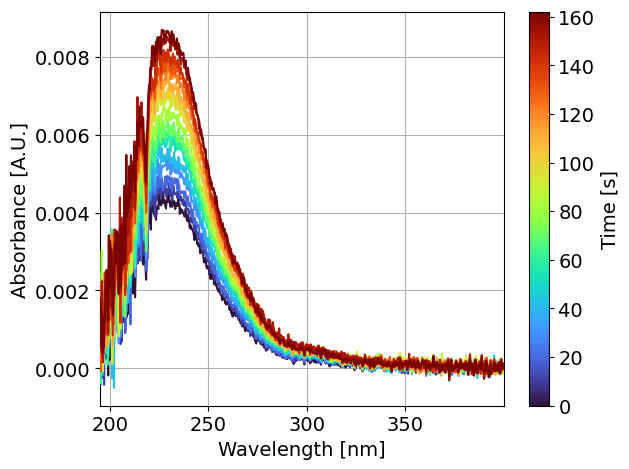

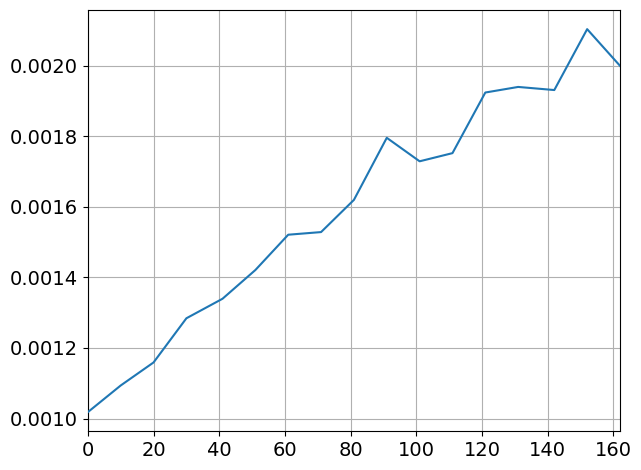

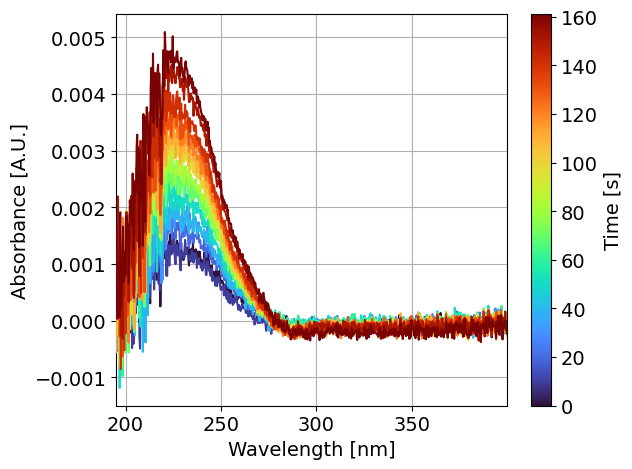

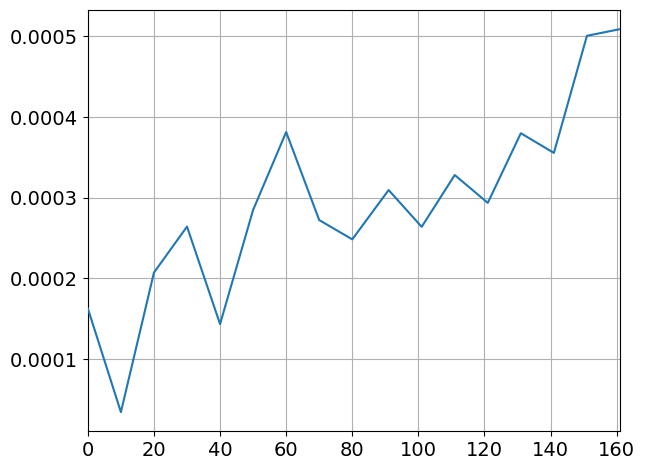

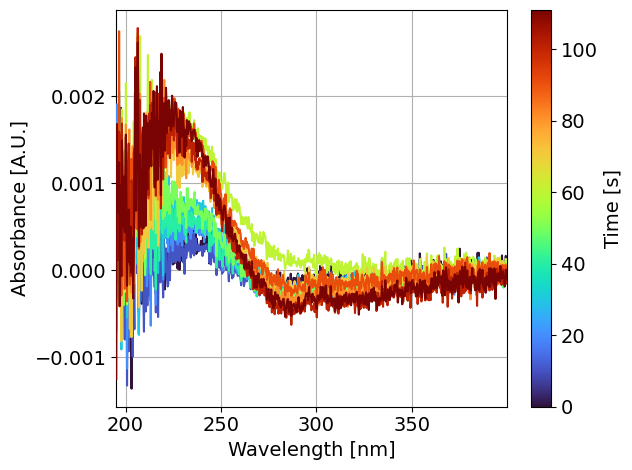

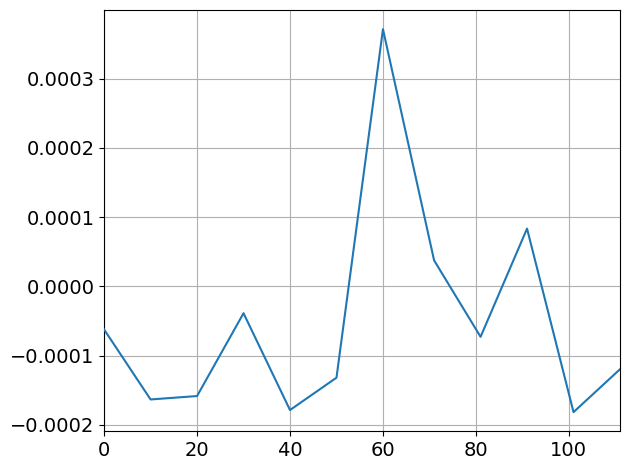

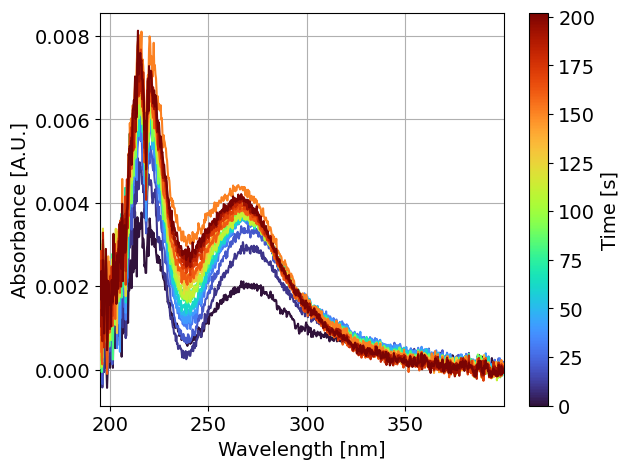

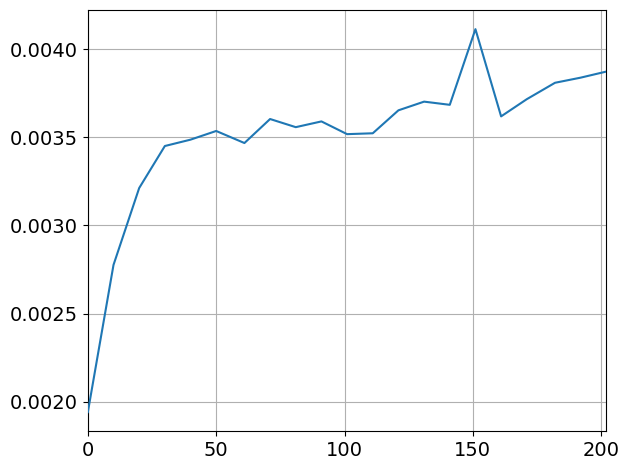

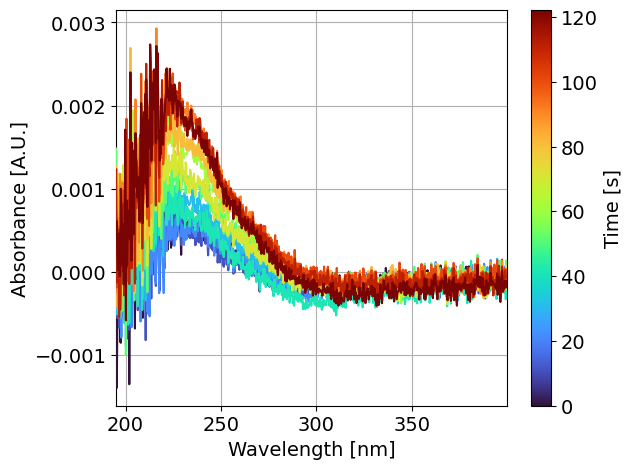

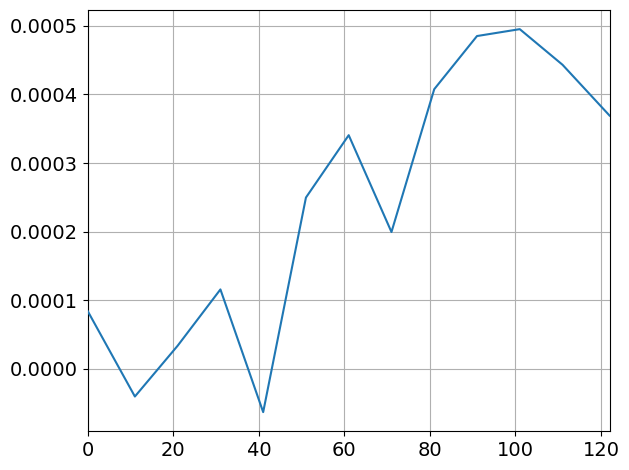

In [8]:
loc2 = r'E:\OneDrive - TU Eindhoven\Master thesis\Results\Air_3slm_Ar_1slm_9kV'
for t in (0.3, 0.5, 1, 2, 3):
    data2 = read_hdf5(rf'{loc2}_{t}us.hdf5')
    absorption = data2['absorbance']
    oes = data2['emission']
    wavelength_ranges = ((270, 330), (654, 659), (690, 860), (776, 779))
    oes = oes.remove_background_interp_off(is_on_kwargs={'wavelength_range': wavelength_ranges, 'relative_threshold': 0.3})
    mask = oes.is_on(wavelength_range=wavelength_ranges, relative_threshold=0.25)
    on_time = oes.times[np.argwhere(np.diff(mask.astype(int)) == 1)[0, 0] - 1]
    
    absorbances = absorption.get_absorbances(masked=False)
    mask = (400 < absorption.get_wavelength(masked=False)) & (absorption.get_wavelength(masked=False) < 500)
    average = np.mean(absorbances[:, mask], axis=1)
    
    mask = absorption.variable <= on_time
    
    normed_absorbance = absorption.get_absorbances(corrected=True)[mask] - average[:, None][mask]
    times = absorption.variable[mask] - absorption.variable[0]
    colors, cm = cbar.cbar_norm_colors(times)
    save_loc = rf'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Measurement techniques\lamp_stability_{t}.pdf'
    plot_kwargs = {'xlabel': 'Wavelength [nm]', 'ylabel': 'Absorbance [A.U.]'}
    plot.lines(absorption.get_wavelength(), normed_absorbance, colors=colors,
               cbar_kwargs={'mappable': cm, 'label': 'Time [s]'}, save_loc=save_loc, plot_kwargs=plot_kwargs)
    
    interested = (260, 280)
    mask = (interested[0] < absorption.get_wavelength()) & (absorption.get_wavelength() < interested[1])
    avg_heap = np.mean(normed_absorbance[:, mask], axis=1)
    plot.lines(times, avg_heap)

Air_1slm_Ar_3slm_8kV_3us.hdf5
Air_2slm_Ar_2slm_10kV_0.5us.hdf5
Air_2slm_Ar_2slm_10kV_1us.hdf5
Air_2slm_Ar_2slm_10kV_2us.hdf5
Air_2slm_Ar_2slm_10kV_3us.hdf5
Air_2slm_Ar_2slm_8kV_0.3us.hdf5
Air_2slm_Ar_2slm_8kV_0.5us.hdf5
Air_2slm_Ar_2slm_8kV_1us.hdf5
Air_2slm_Ar_2slm_8kV_2us.hdf5
Air_2slm_Ar_2slm_8kV_3us.hdf5
Air_2slm_Ar_2slm_8kV_5us.hdf5
Air_2slm_Ar_2slm_9kV_0.3us.hdf5
Air_2slm_Ar_2slm_9kV_0.5us.hdf5
Air_2slm_Ar_2slm_9kV_1us.hdf5
Air_2slm_Ar_2slm_9kV_2us.hdf5
Air_2slm_Ar_2slm_9kV_3us.hdf5
Air_3slm_Ar_1slm_10kV_0.5us.hdf5
Air_3slm_Ar_1slm_10kV_1.5us.hdf5
Air_3slm_Ar_1slm_10kV_1us.hdf5
Air_3slm_Ar_1slm_10kV_2us.hdf5
Air_3slm_Ar_1slm_10kV_3us.hdf5
Air_3slm_Ar_1slm_10kV_5us.hdf5
Air_3slm_Ar_1slm_8kV_0.5us.hdf5
Air_3slm_Ar_1slm_8kV_1us.hdf5
Air_3slm_Ar_1slm_8kV_2us-2.hdf5
Air_3slm_Ar_1slm_8kV_2us.hdf5


C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Air_3slm_Ar_1slm_8kV_3us.hdf5


C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Air_3slm_Ar_1slm_8kV_5us.hdf5
Air_3slm_Ar_1slm_9kV_0.3us.hdf5
Air_3slm_Ar_1slm_9kV_0.5us.hdf5
Air_3slm_Ar_1slm_9kV_1us.hdf5
Air_3slm_Ar_1slm_9kV_2us.hdf5
Air_3slm_Ar_1slm_9kV_3us.hdf5
Air_4slm_8kV_0.3us.hdf5


C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\experiments\oes\_OES.py:110: UserWarning: No background found. Assuming first and last third are background
  warnings.warn('No background found. Assuming first and last third are background')
C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Air_4slm_8kV_0.5us.hdf5
Air_4slm_8kV_1us.hdf5
Air_4slm_8kV_2us.hdf5


C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Air_4slm_8kV_5us.hdf5
Air_4slm_9kV_0.5us.hdf5
Air_4slm_9kV_1.5us.hdf5
Air_4slm_9kV_1us.hdf5
Air_4slm_9kV_2us.hdf5


C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\experiments\oes\_OES.py:110: UserWarning: No background found. Assuming first and last third are background
  warnings.warn('No background found. Assuming first and last third are background')


Air_4slm_9kV_3us.hdf5
Air_4slm_9kV_5us.hdf5


C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Ar_1slm_10us_7.5kV.hdf5
Ar_1slm_5us_7.5kV.hdf5
Ar_1slm_Air_3slm_10kV_1.5us.hdf5
Ar_1slm_Air_3slm_10kV_3us.hdf5
Ar_1slm_Air_3slm_10kV_5us.hdf5
Ar_3slm_4.5kV_0.3us.hdf5
Ar_3slm_4.5kV_1us.hdf5
Ar_3slm_4.5kV_5us.hdf5
Ar_3slm_4kV_0.3us.hdf5
Ar_3slm_4kV_0.5us.hdf5


C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\20222772\AppData\Local\anaconda3\envs\MasterProject\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Ar_3slm_4kV_1us.hdf5
Ar_3slm_4kV_2us.hdf5
Ar_3slm_4kV_5us.hdf5
Ar_3slm_5kV_0.3us.hdf5
Ar_3slm_5kV_0.5us.hdf5
Ar_3slm_5kV_1us.hdf5
Ar_3slm_5kV_2us.hdf5
Ar_3slm_5kV_5us.hdf5


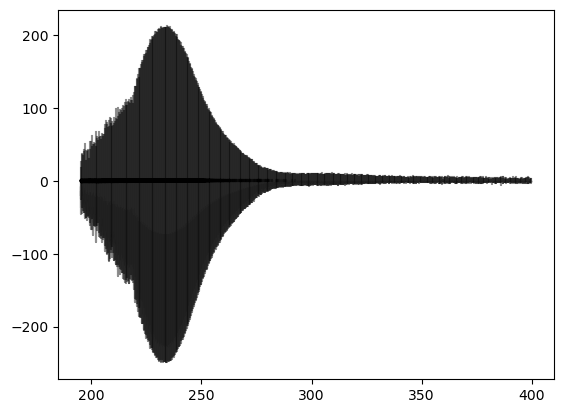

In [22]:
times_vals = []
abs_vals = []
abs_vals2 = []
abs_vals2 = []
names = []
loc2 = r'E:\OneDrive - TU Eindhoven\Master thesis\Results'
fig, ax = plt.subplots()
for file_name in os.listdir(loc2):
    if file_name in ('Air_2slm_Ar_2slm_10kV_1.5us.hdf5', ):
        continue
    if not file_name.endswith('.hdf5'):
        continue
    print(file_name)
    data2 = read_hdf5(rf'{loc2}\{file_name}')
    absorption = data2['absorbance']
    oes = data2['emission']
    wavelength_ranges = ((270, 330), (654, 659), (690, 860), (776, 779))
    oes = oes.remove_background_interp_off(is_on_kwargs={'wavelength_range': wavelength_ranges, 'relative_threshold': 0.3})
    mask = oes.is_on(wavelength_range=wavelength_ranges, relative_threshold=0.25)
    on_time = oes.times[np.argwhere(np.diff(mask.astype(int)) == 1)[0, 0] - 1]
    
    absorbances = absorption.get_absorbances(masked=False)
    mask = (400 < absorption.get_wavelength(masked=False)) & (absorption.get_wavelength(masked=False) < 500)
    average = np.mean(absorbances[:, mask], axis=1)
    
    mask = absorption.variable <= on_time
    
    normed_absorbance = absorption.get_absorbances(corrected=True)[mask] - average[:, None][mask]
    times = absorption.variable[mask] - absorption.variable[0]
    
    colors, cm = cbar.cbar_norm_colors(times)
    save_loc = rf'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Measurement techniques\lamp_stability_{file_name}.pdf'
    plot_kwargs = {'xlabel': 'Wavelength [nm]', 'ylabel': 'Absorbance [A.U.]'}
    plot.lines(absorption.get_wavelength(), normed_absorbance, colors=colors,
               cbar_kwargs={'mappable': cm, 'label': 'Time [s]'}, save_loc=save_loc, plot_kwargs=plot_kwargs, show=False, close=True)
    
    mask_100 = (absorption.variable - absorption.variable[0]) <= 100
    
    normed_absorbance = absorption.get_absorbances(corrected=True)[mask_100] - average[:, None][mask_100]
    times = absorption.variable[mask_100] - absorption.variable[0]
    
    colors, cm = cbar.cbar_norm_colors(times)
    plot_kwargs = {'xlabel': 'Wavelength [nm]', 'ylabel': 'Absorbance*1000 [A.U.]'}
    save_loc = rf'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Measurement techniques\lamp_stability_100_{file_name}.pdf'
    plot.lines(absorption.get_wavelength(), 1000*normed_absorbance, colors=colors,
               cbar_kwargs={'mappable': cm, 'label': 'Time [s]'}, save_loc=save_loc, plot_kwargs=plot_kwargs, show=False, close=True)
    save_loc = rf'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Measurement techniques\lamp_stability_100_{file_name}_l.pdf'
    plot.lines(absorption.get_wavelength(), 1000*normed_absorbance, colors=colors, save_loc=save_loc, plot_kwargs=plot_kwargs, show=False, close=True)
    save_loc = rf'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Measurement techniques\rel_lamp_stability_100_{file_name}_l.pdf'
    plot.lines(absorption.get_wavelength(), 1000*(normed_absorbance-normed_absorbance[0]), colors=colors, save_loc=save_loc, plot_kwargs=plot_kwargs, show=False, close=True)
    
    wavs = [absorption.get_wavelength() for _ in range(len(normed_absorbance))]
    ax.plot(wavs, normed_absorbance/np.max(normed_absorbance, axis=1)[:, None], color='k', alpha=0.25)
  
    interested = (260, 280)
    mask2 = (interested[0] < absorption.get_wavelength()) & (absorption.get_wavelength() < interested[1])
    avg_heap = np.mean(normed_absorbance[:, mask2], axis=1)
    
    on_index = np.argwhere(np.diff(mask.astype(int)) == -1)[0, 0]
    new_background = np.mean(normed_absorbance[on_index//4:3*on_index//4], axis=0)
    new_absorbance = normed_absorbance - new_background
    avg_heap2 = np.mean(new_absorbance, axis=1)
    
    times_vals.append(times)
    abs_vals.append(avg_heap)
    abs_vals2.append(avg_heap2)

save_loc =  rf'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Measurement techniques\lamp_stability_100_cbar.pdf'
plot.export_cbar(cbar_kwargs={'mappable': cm, 'label': 'Time [s]'}, save_loc=save_loc)

C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:359: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\20222772\PycharmProjects\MasterDataAnalysis\General\plotting\plot.py:359: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


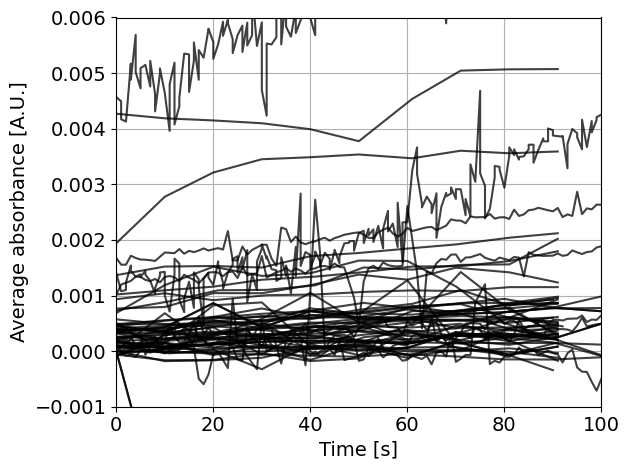

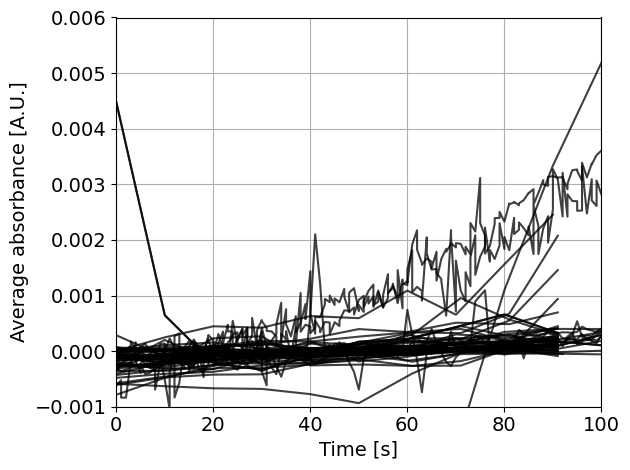

In [12]:
plot_kwargs = {'xlim': (0, 100), 'ylim': (-0.001, 0.006), 'ylabel': 'Average absorbance [A.U.]', 'xlabel': 'Time [s]'}
colors = [(0, 0, 0, 0.75)]*len(times_vals)
save_loc = r'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Measurement techniques\lamp_stability_time.pdf'
plot.lines(times_vals, abs_vals, plot_kwargs=plot_kwargs, colors=colors, save_loc=save_loc)
save_loc = r'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Measurement techniques\lamp_stability_time2.pdf'
plot.lines(times_vals, abs_vals2, plot_kwargs=plot_kwargs, colors=colors, save_loc=save_loc)